# Setup
Make sure to run the simple_server.py file in a separate terminal before beginning this exercise

## Basic Requests

In [2]:
import requests
base = "http://localhost:5000"

requests.get(base)

<Response [200]>

In [3]:
requests.get(base).content

b'<h1>Hello, world</h1>'

In [6]:
response = requests.get(f"{base}/teapot")
print(response.status_code)
print(response.content)
print(response.headers)

418
b"I'm a teapot"
{'Server': 'Werkzeug/3.1.3 Python/3.13.9', 'Date': 'Wed, 05 Nov 2025 21:33:40 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '12', 'Connection': 'close'}


In [16]:
response = requests.get(f"{base}/api")

for test in response.content[:10]:
    print(test) # these are bytes!!!

print()
print()

print()
for key, val in response.json().items(): # convert to json first (if it's valid json)
    print(key, ' - ', val) # this is a dictionary!

123
34
100
101
98
117
103
103
105
110



debugging.md  -  {'size': 8071, 'last_modified': 1759707612.5380356, 'created': 1759707612.5380356, 'ext': '.md', 'type': 'file'}
debugging_summary.pptx  -  {'size': 48737, 'last_modified': 1759707612.5390544, 'created': 1759707612.5390544, 'ext': '.pptx', 'type': 'file'}
Executables and Paths.pptx  -  {'size': 1949407, 'last_modified': 1759708014.7426717, 'created': 1759708014.7426717, 'ext': '.pptx', 'type': 'file'}
HTTP and APIs.pptx  -  {'size': 56616, 'last_modified': 1762378546.9147253, 'created': 1762378546.9147253, 'ext': '.pptx', 'type': 'file'}
Recursion.pptx  -  {'size': 392933, 'last_modified': 1760563740.6366854, 'created': 1760563740.6366854, 'ext': '.pptx', 'type': 'file'}
recursion.py  -  {'size': 2187, 'last_modified': 1760563709.4163942, 'created': 1760563709.4163942, 'ext': '.py', 'type': 'file'}
refactoring.md  -  {'size': 5232, 'last_modified': 1759707612.5400696, 'created': 1759707612.5400696, 'ext': '.md', 'type': 'file'}


## Other Requests
Different request methods

In [20]:
response = requests.post(f"{base}/requestType")
print(response.text)

response = requests.get(f"{base}/requestType")
print(response.text)

# post, put, patch, delete, options, etc

Server received POST HTTP request
Server received GET HTTP request


Sending data with your requests

In [25]:
response = requests.get(f"{base}?hello=world") # this is common with get requests
print(response.text)

# this is common with post requests, also works with get requests
response = requests.post(f"{base}", params={"hello": "world"})
print(response.text)

# for more info, this is pretty good https://www.echoapi.com/blog/url-vs-body-parameters-in-apis-key-differences-and-how-to-avoid-common-mistakes/

<h1>Hello, world</h1>
- Server received: {"hello": "world"}
<h1>Hello, world</h1>
- Server received: {"hello": "world"}


## Real World
These don't need the server running anymore

Taken largely from here: https://github.com/public-apis/public-apis

In [33]:
cat_url = "https://meowfacts.herokuapp.com/"
print(requests.get(f"{cat_url}").json())
print()
print(requests.get(cat_url, params={"count": 3}).json())

{'data': ['Cats do not think that they are little people. They think that we are big cats. This influences their behavior in many ways.']}

{'data': ['Owning a cat can reduce the risk of stroke and heart attack by a third.', "Jaguars are the only big cats that don't roar.", 'The worlds richest cat is worth $13 million after his human passed away and left her fortune to him.']}


In [41]:
uuid_url = "https://www.uuidtools.com/api/generate/v1"
print(requests.get(uuid_url).json())

['5149db04-ba92-11f0-9f68-325096b39f47']


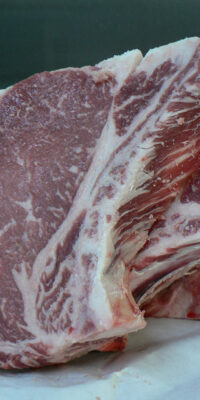

In [ ]:
# and last but not least...
from IPython.display import Image
from random import choice
bacon_url = "https://baconmockup.com/"
def size(): return choice([100 * x for x in range(1, 6)])
response = requests.get(f"{bacon_url}/{size()}/{size()}")
Image(response.content)